# Proyecto 2. Entrega 4:  K-nearest neighbors
Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: 

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#cargar los datos
import pandas as pd 
df_train = pd.read_csv("train.csv")

## 1.  Elabore un modelo de regresión usando K nearest Neighbors (KNN), el conjunto de entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los mismos de las entregas anteriores para que los modelos sean comparables. 

In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

df_categorico = df_train.select_dtypes(include=['object'])

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

#nombres de las columnas categoricas y numéricas
categorical_columns = [col for col in df_train.select_dtypes(include=['object']).columns if col in X.columns]
numerical_columns = [col for col in df_train.select_dtypes(include=['number']).columns if col in X.columns]

if 'SalePrice' in numerical_columns:
    numerical_columns.remove('SalePrice')

# crear el preprocesador completo
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

# Crear pipeline con el preprocesador y KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Definir hiperparámetros a optimizar en la búsqueda
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Diferentes valores de k
    'knn__weights': ['uniform', 'distance'],  # Peso de los vecinos
    'knn__p': [1, 2]  # Distancia Manhattan (p=1) vs Euclidiana (p=2)
}

# Validación cruzada con 5 folds y GridSearch
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtS...
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF', ...])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [194]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}


In [195]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, root_mean_squared_error, r2_score, mean_squared_error

y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)


print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("R^2 en entrenamiento:", r2_score(y_train, y_train_pred))
print("Error cuadrático medio (MSE) en prueba:",  mean_squared_error(y_test, y_test_pred))
print("R^2 en prueba:", r2_score(y_test, y_test_pred))

Error cuadrático medio (MSE) en entrenamiento: 0.0
R^2 en entrenamiento: 1.0
Error cuadrático medio (MSE) en prueba: 1466676096.0475838
R^2 en prueba: 0.8140463535727902


Estos resultados, lo nos indican es que el modelo predice perfectamente los valores del conjunto de entrenamiento.  Y que el modelo explica el 100% de la variabilidad del conjunto.  Ademas, el MSE del conjunto de prueba, indica que hay un error en las predicciones del modelo cuando se aplican datos nuevos, tambien indica que el modelo no generaliza bien los datos nuevos.
Esto lo que indica es que existe overfitting, porque esta muy bien ajustado a los datos de entrenamiento y no generaliza bien los datos nuevos. Entonces, hay que aplicar alguna tecnica para el modelo y reducir el sobreajuste.

In [196]:

# Mejor modelo encontrado
best_knn = grid_search.best_estimator_
print(f"Mejor hiperparámetro: {grid_search.best_params_}")
# Evaluación en el conjunto de prueba
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse}")
print(f"R² en test: {r2}")


Mejor hiperparámetro: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
RMSE en test: 38297.20741839519
R² en test: 0.8140463535727902


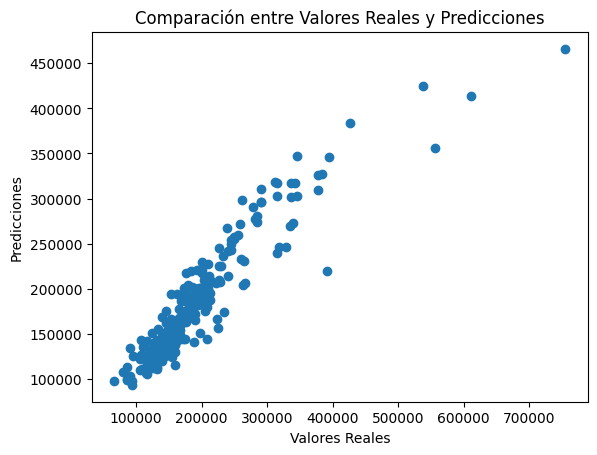

In [197]:
# Visualización de errores
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.show()

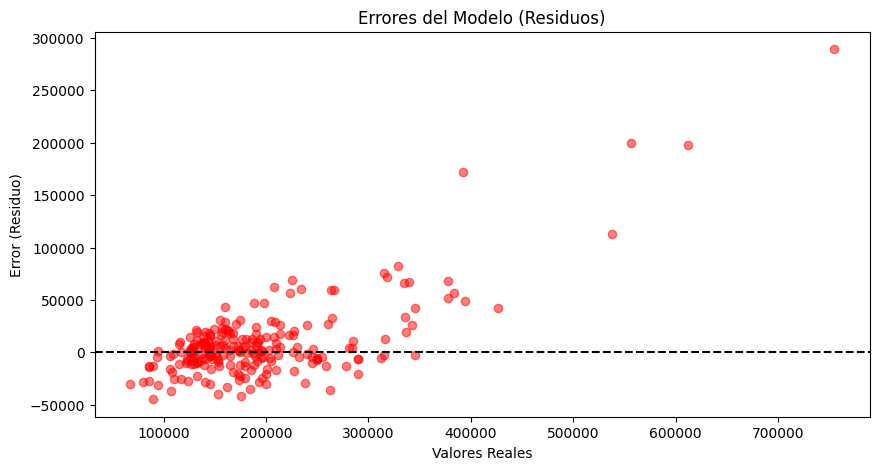

In [198]:
plt.figure(figsize=(10,5))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Error (Residuo)")
plt.title("Errores del Modelo (Residuos)")
plt.show()

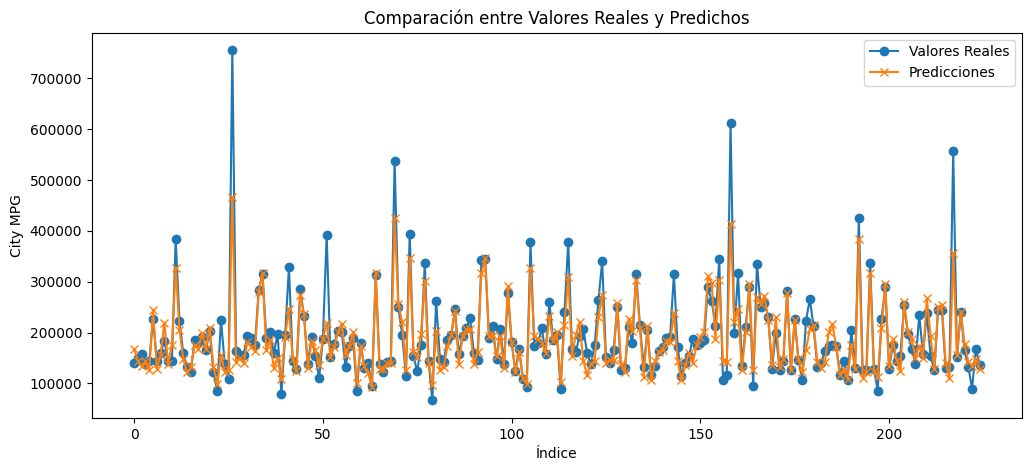

In [199]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test.values, label="Valores Reales", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicciones", marker='x')
plt.xlabel("Índice")
plt.ylabel("City MPG")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

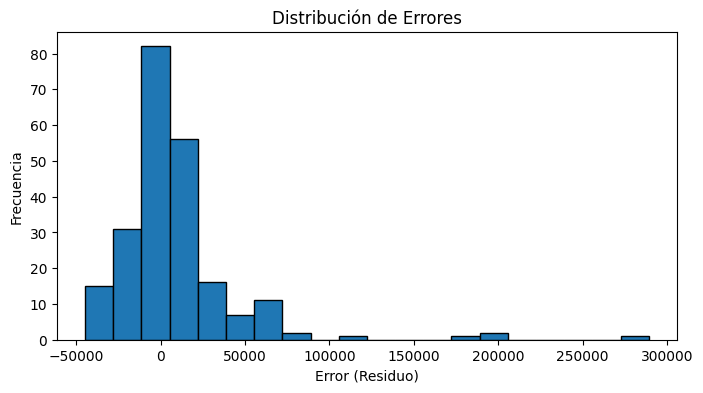

In [200]:
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")
plt.show()


### Mejora del modelo, para bajar el overfitting:

In [201]:
accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.

----

In [202]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# normalizacion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Ajuste de hiperparametros
best_k = 2 

# modelo
knn = KNeighborsRegressor(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train_pca, y_train_pca)

# Predicciones
y_pred_train_pca = knn.predict(X_train_pca)
y_pred_test_pca = knn.predict(X_test_pca)


# Analizar el modelo
print("Error cuadrático medio (MSE) en entrenamiento:",  mean_squared_error(y_train_pca, y_pred_train_pca) )
print("R^2 en entrenamiento:", r2_score(y_train_pca, y_pred_train_pca))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test_pca, y_pred_test_pca))
print("R^2 en prueba:", r2_score(y_test_pca, y_pred_test_pca))

Error cuadrático medio (MSE) en entrenamiento: 626028934.5558035
R^2 en entrenamiento: 0.9052484153517774
Error cuadrático medio (MSE) en prueba: 1593037886.3033333
R^2 en prueba: 0.7980254777090271


## 2. Analice los resultados del modelo de regresión usando KNN. ¿Qué tan bien le fue prediciendo? Utilice las métricas correctas. 

Al analisar el MSE, el conjunto de prueba es mayor que el conjunto de entrenamiento, lo que nos indica es que el modelo puede estar sobreajustado.

Mientras que el R^2 en entrenamiento es alto, por lo cual el modelo explico bien la variabilidad de los datos de entrenamiento. Siendo el de prueba mas bajo, entonces el modelo no generaliza bien los datos de prueba, sugiriendo de nuevo que el modelo puede estar sobreajustado.
Entonces, teniendo en cuenta esto se debe de realizar tecnicas para reducir el sobreajuste.


Luego de aplicarle PCA por el sobreajuste, definitivamente mejoró el modelo con un R^2 en entrenamiento de 0.90, al igual el de pureba con 0.798. Mientras que de MSE en entrenamiento y test disminuyo más, entonces el conjunto ya hace preducciones más precisas.

## 3. Compare los resultados con el modelo de regresión lineal, el mejor modelo de árbol de regresión y de naive bayes que hizo en las entregas pasadas. ¿Cuál funcionó mejor?

Al comparalo con los demás modelos, definitivamente el de R^2 con random forest ha sido el que mejor explica la variabilidad de los datos, teniendo buenas predicciones con datos nuevos. Además, el MSE del random forest tiene los resultados más bajos en las pruebas, entonces, sus predicciones están más cercanos a los valores reales. Por lo tanto, el modelo de random forest es el mejor modelo para predecir estimar el valor de inmuebles.

## 4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las casas (barata, media y cara) como variable respuesta. 

In [212]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())


SalePrice_Class
High            497
Economic        483
Intermediate    480
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


df_train = df_train.loc[df_numerico.index]

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

print("Variables numéricas:", variables_numericas)

X = df_numerico[variables_numericas].drop(columns=['SalePrice'], errors='ignore')
y = df_train['SalePrice_Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalización de los datos 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Probar diferentes valores de K
accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))



Variables numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Shape of X: (1121, 37)
Shape of y: (1121,)


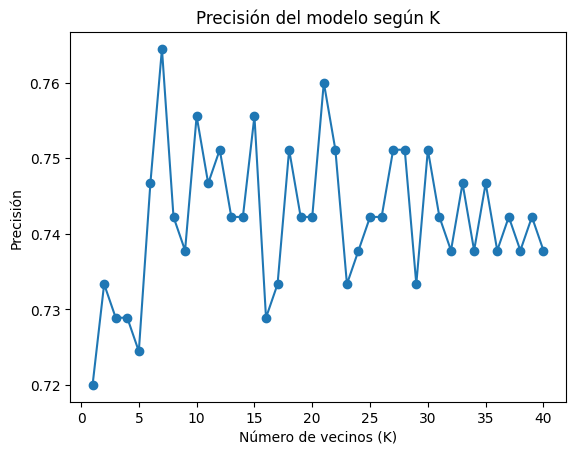

In [206]:
# Graficar la precisión vs. K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo según K')
plt.show()

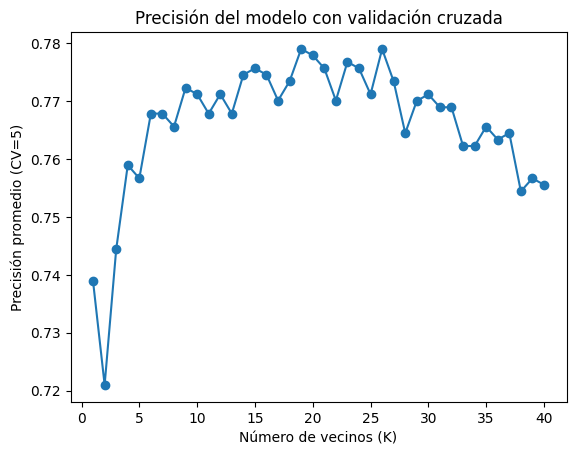

Mejor valor de K según CV=5: 19


In [207]:
# Graficamos los resultados
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión promedio (CV=5)')
plt.title('Precisión del modelo con validación cruzada')
plt.show()

# Mejor K basado en la validación cruzada
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K según CV=5: {best_k}")

In [208]:
import math
print(math.sqrt(len(y_test)))

15.0


In [209]:
# Mejor K basado en la validación cruzada
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K según CV=5: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k, p=3, metric='euclidean')
knn.fit(X_train, y_train)

Mejor valor de K según CV=5: 19


KNeighborsClassifier(metric='euclidean', n_neighbors=19, p=3)

## 5. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar. 

In [ ]:
# Predicción en el conjunto de prueba
y_pred = knn.predict(X_test)

In [211]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Matriz de Confusión:
[[51  0  5]
 [ 1 73 15]
 [22 15 43]]
Reporte de Clasificación:
              precision    recall  f1-score   support

    Economic       0.69      0.91      0.78        56
        High       0.83      0.82      0.82        89
Intermediate       0.68      0.54      0.60        80

    accuracy                           0.74       225
   macro avg       0.73      0.76      0.74       225
weighted avg       0.74      0.74      0.74       225

Precisión del modelo: 0.74


## 6. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

## 7. Analice el modelo. ¿Cree que pueda estar sobreajustado?

## 8. Haga un modelo usando validación cruzada, compare los resultados de este con los del modelo anterior. ¿Cuál funcionó mejor? 

## 9. Tanto para los modelos de regresión como de clasificación, pruebe con varios valores de los hiperparámetros ¿Qué parámetros pueden tunearse en un KNN?, use el mejor modelo del  tuneo, ¿Mejoraron los resultados usando el mejor modelo ahora? Explique

## 10.  Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de clasificación), el modelo de random forest y el de naive bayes que hizo en las entregas pasadas. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar? 